In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

#### crop faces

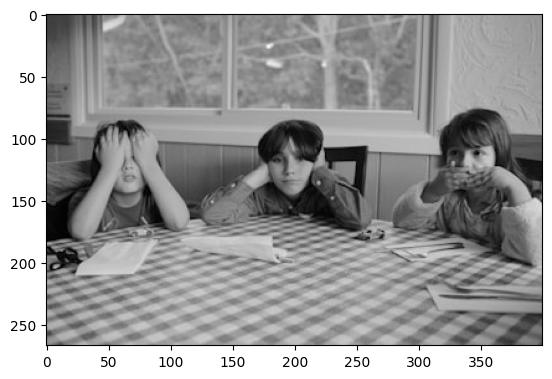

In [9]:
img = cv.imread("../images/raw/sad/2-women-sitting-on-chair-in-front-of-table-YtvItJoIREk.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap="gray")
plt.show()

In [10]:
RAW_PATH= "../images/raw"
FACE_PATH = "../images/faces"

In [11]:
os.makedirs(FACE_PATH + "/happy")
os.makedirs(FACE_PATH + "/sad")

In [13]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

In [14]:
for emotion in ["happy", "sad"]:
    emotion_path = f"{RAW_PATH}/{emotion}"
    for file in os.listdir(emotion_path):
        img = cv.imread(f"{emotion_path}/{file}")
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.1, 3)
        if faces.__len__() == 0:
            continue

        for (x, y, w, h) in faces: 
            face = img[y:y + h, x:x + w] 
            cv.imwrite(f"{FACE_PATH}/{emotion}/{file}", face) 

#### resize with padding

In [16]:
shapes = {"sad": [], "happy": []}
for emotion in ["happy", "sad"]:
    emotion_path = f"{FACE_PATH}/{emotion}"
    for file in os.listdir(emotion_path):
        img = cv.imread(f"{emotion_path}/{file}")
        shapes[emotion].append(img.shape[0])

In [18]:
np.median(shapes["happy"])

np.float64(54.0)

In [19]:
RESIZED_PATH = "../images/resized"
os.makedirs(RESIZED_PATH + "/happy")
os.makedirs(RESIZED_PATH + "/sad")

In [21]:
TARGET_SIZE = 60, 60

for emotion in ["happy", "sad"]:
    emotion_path = f"{FACE_PATH}/{emotion}"
    for file in os.listdir(emotion_path):
        img = Image.open(f"{emotion_path}/{file}")
        if img.size[0] < TARGET_SIZE[0]:
            delta_width = 60 - img.size[0]
            delta_height = 60 - img.size[1]

            pad_width = delta_width // 2
            pad_height = delta_height // 2
            padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
            img = ImageOps.expand(img, padding)
        else:
            img.thumbnail((60, 60), Image.Resampling.LANCZOS)

        img.save(f"{RESIZED_PATH}/{emotion}/{file}")